## The estimation game

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

#### Root mean squared error

In [2]:
def RMSE(estimates, actual):
    e2 = [(estimate - actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [7]:
import random

def Estimate1(n=7, iters=1000):
    
    mu = 0
    sigma = 1
    
    means=[]
    medians = []
    
    for _ in range(iters):
        xs = [random.gauss(mu,sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    
    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))

Estimate1()

Experiment 1
rmse xbar 0.37036617824396867
rmse median 0.4614373126686741


#### Estimating variance

In [8]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [11]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1
    
    estimates1 = []
    estimates2 = []
    
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
        
    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))

Estimate2()

mean error biased -0.1694407679228514
mean error unbiased -0.031014229243326613


#### The Sample distribution

In [12]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        print("number list: ", xs, 'The mean: ', xbar)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

number list:  [ 89.18707738  93.68896956  84.88036554  94.80619336  71.07718266
  85.75454528  74.04072896 114.04682287  86.44119783] The mean:  88.21367593718433
number list:  [93.97915981 96.44793944 91.27104855 90.24749937 98.90140967 96.62129573
 89.45342253 97.5066088  89.22841644] The mean:  93.73964448266352
number list:  [ 94.43479888  87.44535828  92.44008768  87.00842074 106.13690559
  83.85891079  90.8948879   88.28787525  89.2940872 ] The mean:  91.08903692359662
number list:  [102.48885881  87.01220078  94.0921166   80.28355086  88.877897
  81.98137729  96.16076512  89.93754584  85.99419245] The mean:  89.64761163911604
number list:  [ 93.74142524  90.51450772  86.28330703  83.63798215  82.49939114
  84.3683415   80.67480431  81.90800557 103.44599615] The mean:  87.45264008866482
number list:  [ 93.471795    90.23578279  94.78566637  87.31319616  97.51740201
 101.68024453  92.66526992  88.89825847  83.43575405] The mean:  92.2225965901567
number list:  [92.23605248 77.9940

  79.17696132  77.54702202  83.283875    84.8784028 ] The mean:  88.59228858326877
number list:  [ 80.85676358 103.2749693   82.08498321  91.99257817  90.70553941
  91.52216888  91.2835228   84.14689777  96.40054041] The mean:  90.25199594750532
number list:  [89.60936421 99.56671499 96.56726079 92.30724284 76.25792219 94.37834213
 98.37293798 89.85211413 87.24322392] The mean:  91.57279146554065
number list:  [90.82716801 82.01579423 97.0182757  85.03583115 94.60208495 94.96897071
 93.36373833 85.22055144 83.44566222] The mean:  89.61089741351948
number list:  [86.23546196 80.28600904 95.51888259 89.0493017  91.90908261 99.25514668
 98.12847525 86.34222636 93.83243655] The mean:  91.17300252578282
number list:  [ 90.11584628  81.99209202  89.36033687  95.60582512  67.41720613
  90.49671738 103.89770071  79.67606478  86.86139215] The mean:  87.26924238335262
number list:  [ 96.27046211  96.51956144  87.76191223  93.13545165 115.8184386
  74.77554305 102.38342547  91.20140917  79.049392

number list:  [ 87.4922032   72.82618928  86.89500196  83.79764464 104.17700826
  84.9670792   85.0749587  102.38759884 108.7220276 ] The mean:  90.70441241011119
number list:  [ 88.35684844  85.2718536  102.52768638  94.66072614  79.18303436
  79.95792541  87.88922016  96.28910341  82.01626372] The mean:  88.46140684494452
number list:  [89.21045618 86.1473857  85.4826041  96.85323827 87.80366782 84.27451291
 97.98673753 91.32948717 89.81580105] The mean:  89.87821008151806
number list:  [78.41106082 93.59263654 84.83166656 92.90367042 83.18295726 94.25273091
 89.7459475  93.53857324 82.1300037 ] The mean:  88.06547188318862
number list:  [ 82.12712397  99.71055513  95.56536022  93.18847774  92.2958007
  96.6510051   93.05099094 101.97815969  97.34384722] The mean:  94.65681341150506
number list:  [97.85385589 87.21123097 88.37006939 93.12110135 87.34208141 96.48528669
 94.08502279 96.23243216 89.91873392] The mean:  92.29109050696604
number list:  [103.02788897  84.3568764   96.05069

number list:  [ 69.66807116  98.29977116 102.49600911  91.12462884  81.40263759
  93.6596754   78.62411886  74.52599811  76.63487912] The mean:  85.1595321508095
number list:  [ 89.65392448  81.84764674  92.90348763  93.48363165 102.75382991
 101.65669022  87.63113133  85.62156841  81.54953606] The mean:  90.78904960370237
number list:  [ 95.29046534  89.88272871  87.49363734  92.07955806  80.69933057
  91.54262834 104.63732255  96.43004743  94.78004819] The mean:  92.53730739078668
number list:  [ 97.04734474  80.95982379 102.14522048  91.77020487  93.29611025
  82.06858886  85.77477581 105.37709621  87.1839788 ] The mean:  91.73590486528938
number list:  [ 93.94811453  77.24552198  86.1782038   82.45573076 104.32421399
 104.89568376  77.77072933  93.56001479 101.20081966] The mean:  91.28655917725652
number list:  [ 98.28887825  88.76504347 101.5763705   89.46998269  96.10711459
  92.88275804 110.07226973  89.05518679  83.88745369] The mean:  94.45611752783776
number list:  [ 94.1931

  95.01472612  99.98890167  99.55833378  88.29544265] The mean:  92.529201805629
number list:  [ 97.93736436  82.31493047  96.27260797  92.06456912  84.59749174
  93.64410428  83.33405565 105.8344102   93.6321022 ] The mean:  92.18129288809187
number list:  [ 91.1489994  101.00558817  97.06149365  97.66119682  95.70152096
  72.37522805  90.80203477  93.82502021  89.25455139] The mean:  92.09284815912001
number list:  [79.9528114  83.83488744 90.21095729 84.01025504 84.79821519 93.15221241
 75.50622645 90.60406959 79.95919349] The mean:  84.66986981054836
number list:  [ 83.01950584  87.95358994 105.76193063  87.50832902  91.4337992
  97.57705865  96.89569293  86.79140308  83.41681015] The mean:  91.1509021605598
number list:  [94.31850002 89.90296063 91.21549084 90.29751363 86.17130483 89.68954387
 98.45914274 88.77356818 84.04314134] The mean:  90.3190184529752
number list:  [75.55433417 84.84325737 82.12641664 87.92454151 90.53391599 88.27157553
 94.02992719 85.25108168 91.98557199] 

 77.34195613 84.85045067 97.16976998] The mean:  88.81493450511613
number list:  [ 85.13605841  85.2760366   79.11621187  80.89684519  82.50975902
  77.71806373 101.03727101  83.677964    82.91420228] The mean:  84.25360134505773
number list:  [80.18385053 89.61347701 98.34041086 88.74009443 87.01769692 90.11243571
 80.94791386 93.26115042 81.89968961] The mean:  87.79074659521689
number list:  [ 95.07200938  93.17643964  90.39935176  91.65018374  87.4646034
  87.73665069  85.39128827 100.98649265  99.77829885] The mean:  92.40614648652068
number list:  [81.98296373 85.29824799 93.89365347 93.91504911 89.10294994 91.82774398
 89.65905897 99.90022924 90.69204265] The mean:  90.6968821206491
number list:  [92.75741532 79.30339008 91.85240326 98.28338024 82.45149642 89.90539632
 96.34623867 98.23583307 91.89664518] The mean:  91.22579983971141
number list:  [ 94.33154991  89.1643077   95.05384371  94.02941392 107.20832645
  97.29666611  76.20602596  93.8625268  111.59929344] The mean:  95

  90.19739047  92.92399843  85.15914359  83.13504431] The mean:  90.07696033408725
number list:  [ 82.56408842  99.92373673  72.58849751  93.6087612   96.93866012
  96.92819822  83.44194822  89.91608659 106.01811577] The mean:  91.3253436430994
number list:  [82.49421857 82.71658183 88.81824407 87.81767919 87.26268862 88.69013596
 98.49658346 94.17052974 89.73804944] The mean:  88.91163454392274
number list:  [83.78172233 74.45865524 86.50006777 79.71677126 90.73673361 80.75708679
 89.26615695 89.2831088  94.33942427] The mean:  85.42663633393863
number list:  [ 81.05718118  81.53020775  66.03817578 102.75407122  91.20345945
  91.91338406  79.23706697  88.63692383  97.72896051] The mean:  86.67771452650308
number list:  [94.26439593 91.04745483 82.03783974 93.42563673 92.16054305 95.4164116
 83.38596939 87.45741087 90.2936097 ] The mean:  89.94325242703209
number list:  [81.8061714  86.11386933 88.87758227 88.97422412 77.64798208 79.45040067
 89.7866452  98.05183728 93.21126409] The me

  98.58043506  85.68294133  96.11764111 103.22758314] The mean:  93.6766556599023
number list:  [ 91.95635852  96.13428795  81.9311492   85.84431616  82.49286559
  89.50128681 102.03589163  91.53832542  82.19458338] The mean:  89.29211829502432
number list:  [ 87.30589176  90.05380241  84.1397901   83.23851075 100.9452418
  72.94222988  83.41792416  81.60105565  97.05173389] The mean:  86.74402004474354
number list:  [ 85.68821204 100.28786876  82.82508768  87.32558024  92.70372176
  91.31646013 100.11478845  91.54904341  84.55158585] The mean:  90.7069275910928
number list:  [ 90.26972752  93.3479122   80.07207267  77.21003166  78.32792943
  93.20159775 106.46387563  88.01379697 104.1695503 ] The mean:  90.11961045970051
number list:  [ 96.30666106  86.88800715  89.65070938  91.7985614   82.94384081
  87.80707855 102.70742956  77.06824671  96.70793039] The mean:  90.20871833472476
number list:  [98.88599026 91.24349038 80.07945812 87.9363778  89.25547538 90.29817076
 88.09704996 91.30

No handles with labels found to put in legend.


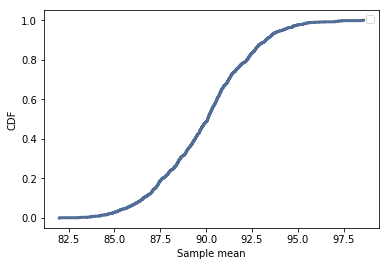

In [13]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel ='Sample mean', ylabel='CDF')

In [14]:
np.mean(xbars)

89.95817350951614

In [15]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.65783400972109, 94.1722691736399)

In [16]:
stderr = RMSE(xbars, 90)
stderr

2.586149483613499

#### Estimating rates

In [19]:
def Estimate3(n=7, iters=1000):
    lam = 2
    
    means = []
    medians = []
    
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
        
    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))

Estimate3()

rmse L 1.1555109587689318
rmse Lm 1.8547272148612086
mean error L 0.3351046609430085
mean error Lm 0.5154267021610187
